In [6]:
import inline as inline
import matplotlib as matplotlib
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

In [45]:
#1 Осуществить чтение данных из файлов. Файл о местоположениях аварий:
locacc_data = pd.read_csv("US_accidents_dec20.csv")  
locacc_data.shape
locacc_data.tail(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,NaN,CA-210 W,R,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [46]:
#1 Осуществить чтение данных из файлов. Файл о местоположениях отелей:
hotels_data = pd.read_csv("new_york_hotels.csv", encoding='windows-1254')
hotels_data.shape
hotels_data.tail(5)  

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
1626,324259,Residence Inn Yonkers Westchester County,7 Executive Blvd,Yonkers,NY,10701,40.97275,-73.88075,3.0,269.36,169.36
1627,107949,Ramada Inn Yonkers,125 Tuckahoe Rd,Yonkers,NY,10710,40.95466,-73.86483,2.5,129.00,119.00
1628,509723,Hyatt Place New York/Yonkers,7000 Mall Walk,Yonkers,NY,10704,40.92625,-73.85438,3.0,249.31,199.31
1629,621870,Hampton Inn & Suites Yonkers - Westchester,555 Tuckahoe Rd,Yonkers,NY,10710,40.95375,-73.84935,2.5,189.19,134.18
1630,683329,Courtyard by Marriott Yonkers Westchester County,5 Executive Boulevard,Yonkers,NY,10701,40.97308,-73.87955,3.0,0.00,0.00


In [43]:
#2 Сформировать выборки. а. Из датафрейма местоположений отелей сформировать датафрейм,содержащий широту и долготу
data_1 = hotels_data[hotels_data["city"] == "New York"] 
data_1 = data_1[["latitude","longitude"]].copy() 
data_1.tail(5)  

,latitude,longitude
1183,40.79974,-73.95889
1184,40.74660,-73.99179
1185,40.75142,-73.98575
1186,40.83071,-73.94302
1187,40.75447,-73.99357


In [47]:
#2 Сформировать выборки. b. Из датафрейма местоположений автомобилей сформировать датафрейм,состоящий из значения широты и долготы в городе Нью-Йорк
data_2 = locacc_data[locacc_data["City"] == "New York"]
data_2 = data_2[["Start_Lat","Start_Lng"]].copy()
data_2.tail(5)

,Start_Lat,Start_Lng
2843385,40.73750,-73.974270
2843916,40.85002,-73.943992
2844444,40.76039,-73.962860
2844464,40.74808,-73.967930
2844953,40.85002,-73.943992


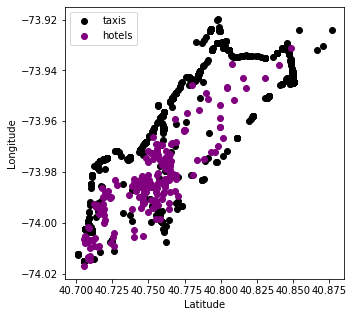

In [74]:
#3 Сбалансировать размерности выборок.
# Вывести график местоположений пунктов назначения и расположений машин такси
taxis_count = 955  
hotels_count = 195  
t_coor = data_2[:taxis_count]  
h_coor = data_1[-hotels_count:]  
#создание графика
fig,ax=plt.subplots()  
fig.set_figheight(5)  
fig.set_figwidth(5) 

#диаграмма рассеивания такси
ax.scatter(t_coor["Start_Lat"],t_coor["Start_Lng"],label="taxis").set_facecolor('black')  
#диаграмма рассеивания отелей
ax.scatter(h_coor["latitude"],h_coor["longitude"],label="hotels").set_facecolor('purple')
plt.legend(loc=0) #задаем область обозначения такси и отелей

plt.xlabel("Latitude")  
plt.ylabel("Longitude")  
plt.show() 

In [22]:
#библиотекa POT: Python Optimal Transport
import ot
import ot.plot

In [78]:
#4 Рассчитайте расстояние между точками из двух сформированных ранее датафреймов.
interval_data = ot.dist(t_coor.values, h_coor.values)  
#нормализация данных
interval_data /= interval_data.max() 
#конвертируем в датафрейм
interval_data = pd.DataFrame(interval_data)  
interval_data.head(5)  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
0,0.328379,0.253078,0.114937,0.242706,0.515216,0.285671,0.496507,0.274051,0.106141,0.554015,0.254608,0.523898,0.289602,0.649629,0.478899,0.244940,0.654395,0.252340,0.127735,0.159610,0.303103,0.310342,0.355970,0.271788,0.324036,0.335818,0.252069,0.372899,0.636265,0.392399,0.160593,0.410527,0.341807,0.045468,0.309916,0.300619,0.350433,0.323883,0.199735,0.203025,0.261338,0.618720,0.612804,0.298707,0.222436,0.505927,0.530913,0.510451,0.516235,0.257287,0.590913,0.536443,0.230746,0.255648,0.272154,0.268378,0.257639,0.217238,0.268659,0.588485,0.692565,0.556209,0.334714,0.233600,0.291935,0.214338,0.345613,0.235460,0.055897,0.272465,0.268376,0.224146,0.356394,0.525201,0.211721,0.141915,0.028030,0.261094,0.301833,0.248156,0.222469,0.250933,0.209151,0.214770,0.233749,0.324496,0.383163,0.320137,0.230813,0.157524,0.281007,0.245447,0.222120,0.303726,0.249134,0.232815,0.162972,0.297686,0.303721,0.360379,0.328188,0.392431,0.513207,0.434693,0.098559,0.285959,0.296724,0.285931,0.264442,0.281001,0.032396,0.306214,0.312280,0.311033,0.265308,0.258838,0.346467,0.237863,0.326226,0.337157,0.255158,0.341861,0.092945,0.644484,0.474438,0.524473,0.490346,0.146157,0.219489,0.523834,0.360714,0.499525,0.004248,0.561321,0.483066,0.633688,0.095522,0.003548,0.651263,0.658905,0.617590,0.655408,0.506893,0.069680,0.074892,0.182179,0.221518,0.440573,0.596896,0.244102,0.055584,0.297670,0.645630,0.124679,0.276132,0.324275,0.355097,0.340549,0.328198,0.504184,0.243613,0.253969,0.075508,0.341937,0.609923,0.636948,0.047986,0.328356,0.263368,0.226180,0.532769,0.249798,0.609599,0.189160,0.242687,0.259178,0.329071,0.291865,0.546336,0.218722,0.545363,0.296791,0.638055,0.076564,0.316142,0.419855,0.309205,0.218340,0.088848,0.225841,0.072401,0.341735,0.301859,0.009841,0.305074
1,0.055861,0.043249,0.007072,0.019084,0.131344,0.029278,0.115051,0.055391,0.029822,0.146100,0.055919,0.135949,0.048977,0.222499,0.111236,0.036786,0.209625,0.022144,0.002112,0.007692,0.076073,0.053320,0.077793,0.027241,0.053917,0.055259,0.022375,0.068514,0.202647,0.079473,0.008112,0.109414,0.069304,0.038246,0.049992,0.044116,0.061271,0.059366,0.013249,0.014174,0.048043,0.185779,0.184236,0.059976,0.025839,0.116908,0.138787,0.123218,0.129174,0.025127,0.187175,0.140179,0.023648,0.023857,0.029826,0.042244,0.041111,0.020993,0.037747,0.185845,0.246607,0.145961,0.075768,0.017430,0.035479,0.019433,0.061785,0.029688,0.027893,0.043507,0.042013,0.018825,0.059806,0.142053,0.034731,0.025331,0.055830,0.061753,0.049684,0.026477,0.026892,0.024440,0.031798,0.023546,0.036570,0.052380,0.107680,0.050009,0.023149,0.007833,0.046844,0.019217,0.028924,0.047656,0.040975,0.035276,0.034008,0.048732,0.064371,0.063154,0.058989,0.088317,0.156014,0.088132,0.032722,0.052880,0.059954,0.051738,0.036024,0.047949,0.050185,0.051277,0.067991,0.061713,0.049773,0.026171,0.072945,0.027559,0.050414,0.064302,0.041434,0.069969,0.010743,0.203146,0.109246,0.138620,0.113549,0.003451,0.025280,0.157500,0.068082,0.141466,0.161963,0.147988,0.109164,0.206738,0.009164,0.126560,0.210676,0.225871,0.193821,0.222541,0.146591,0.021901,0.034865,0.004479,0.048930,0.087867,0.183417,0.028488,0.028153,0.050357,0.217374,0.028655,0.028036,0.052097,0.070369,0.067387,0.059990,0.120790,0.036657,0.020190,0.027669,0.070771,0.194992,0.201504,0.036866,0.055915,0.025906,0.032159,0.146864,0.019492,0.190185,0.012472,0.04

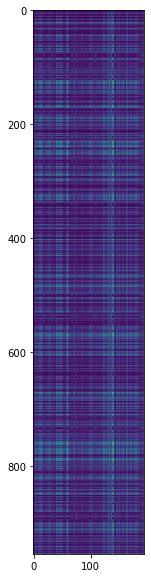

In [91]:
#4 Отобразить на графике расстояние между точками (такси и отели)
#создание матрицы расстояний (1/2,размеры)
plt.figure(2, figsize=(10,10))  
plt.imshow(interval_data.values)  

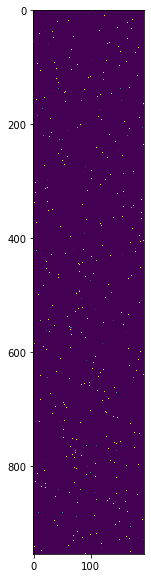

In [98]:
#5 Найдите матрицу оптимальных перемещений (функция emd). Отобразите на графике
go_1, go_2 = interval_data.shape
#распределение объектов равномерно 
a, b = np.ones((go_1,)) / go_1, np.ones((go_2,)) / go_2 

#earth mover's distance (матрицa оптимальных перемещений)
distanse_one = ot.emd(a,b,interval_data.values)  
distanse_two = pd.DataFrame(distanse_one)  
plt.figure(2, figsize=(10,10)) 
plt.imshow(distanse_two.values,interpolation="nearest") #интерпаляция ближайших точек и вывод

Text(0, 0.5, 'longitude')

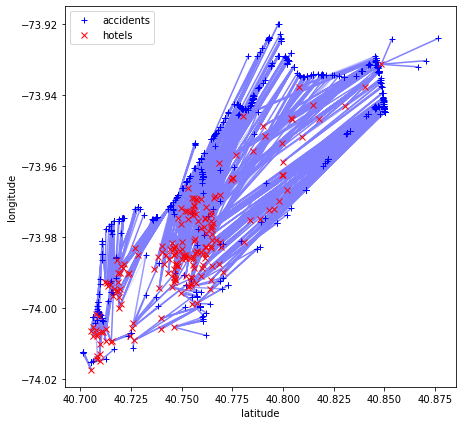

In [108]:
#6 Исходя из полученных данных местоположений отелей и машин отобразите оптимальные расстояния 
#исходные данные: данные местоположений, матрица оптимальных перемещений
plt.figure(3,figsize=(7,7)) 

#матрицa оптимальных расстояний
ot.plot.plot2D_samples_mat(t_coor.values,h_coor.values,distanse_one,c=[.5,.5,1])  

plt.plot(t_coor["Start_Lat"],t_coor["Start_Lng"],"+b",label="accidents",)  

plt.plot(h_coor["latitude"],h_coor["longitude"],"xr",label="hotels",) 

plt.legend(loc=0)  
plt.xlabel("latitude")  
plt.ylabel("longitude")  

In [119]:
#7 Сформируйте датафрейм, содержащий данные по оптимальным местоположениям отелей и такси (id)

id_taxis = 0  
optimal_dist = []  

#просмотр строк distanse_one
for row in distanse_one: 
    id_hotels=0 
    for noun in row:  
        if noun> 0.0:
            optimal_dist.append([id_taxis,id_hotels])
            break
            #проверка следующего отеля
        id_hotels+=1  
          #проверка следующего такси
    id_taxis+=1  
    
optimal_dist = pd.DataFrame(optimal_dist)  
optimal_dist.columns = ['id_taxis','id_hotels']  
optimal_dist.head(5)  


,id_taxis,id_hotels
0,0,104
1,1,21
2,2,112
3,3,134
4,4,140


In [120]:
#7 Создайте два csv файла, которые содержат данные о местоположениях в соответствии с оптимальными маршрутами.
def preparing(df):
    df=df.reset_index(drop=True)
    df["ID"]=df.index
    _id=df["ID"]
    df.drop(labels=["ID"],axis=1,inplace=True)
    df.insert(0,"ID",_id)
    
preparing(h_coor)
preparing(t_coor)

print(h_coor)
print(t_coor)

h_coor.to_csv("hotels.csv",encoding="utf-8",index=False)
t_coor.to_csv("taxis.csv",encoding="utf-8",index=False)

      latitude  longitude
993   40.74617  -73.98508
994   40.76135  -73.98583
995   40.78501  -73.95580
996   40.75748  -73.96959
997   40.71956  -73.99449
...        ...        ...
1183  40.79974  -73.95889
1184  40.74660  -73.99179
1185  40.75142  -73.98575
1186  40.83071  -73.94302
1187  40.75447  -73.99357

[195 rows x 2 columns]
        Start_Lat  Start_Lng
31580   40.850020 -73.943990
31625   40.771460 -73.946580
31710   40.762979 -73.973938
31901   40.744340 -73.971240
32073   40.710680 -74.002720
...           ...        ...
220047  40.797750 -73.919940
220554  40.765180 -73.952120
220969  40.710680 -74.002720
221071  40.787439 -73.944771
221210  40.850020 -73.943990

[955 rows x 2 columns]
